https://www.geeksforgeeks.org/python-image-classification-using-keras/

In [1]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K

##### Here, the train_data_dir is the train dataset directory. 
#### validation_data_dir is the directory for validation data. 
#### nb_train_samples is the total number train samples. 
#### nb_validation_samples is the total number of validation samples.

In [2]:
# Every image in the dataset is of the size 224*224.
train_data_dir = 'C:\\D_Drive\\Work\\Academic Classes\\Image_Processing\\v_data\\train'
validation_data_dir = 'C:\\D_Drive\\Work\\Academic Classes\\Image_Processing\\v_data\\test'
nb_train_samples = 400 
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [7]:
## Checking format of Image:
img_width, img_height = 224, 224

if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else:
    input_shape = (img_width, img_height, 3)

In [10]:
import numpy as np
input_data_reshaped = np.expand_dims(input_shape, axis=-1)
input_data_reshaped = np.expand_dims(input_data_reshaped, axis=0)  # Assuming you have a single sample

In [11]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_data_reshaped)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

TypeError: only integer scalar arrays can be converted to a scalar index

In [12]:
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

In [13]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) 

In [14]:
train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255) 
  
train_generator = train_datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 
  
validation_generator = test_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 
  
model.fit( 
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size, 
    epochs=epochs, 
    validation_data=validation_generator, 
    validation_steps=nb_validation_samples // batch_size)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/10


25/25 [==============================] - 7s 234ms/step - loss: 1.7419 - accuracy: 0.6250 - val_loss: 0.3548 - val_accuracy: 0.8854
Epoch 2/10
25/25 [==============================] - 5s 213ms/step - loss: 0.5801 - accuracy: 0.7150 - val_loss: 0.3412 - val_accuracy: 0.9271
Epoch 3/10
25/25 [==============================] - 6s 227ms/step - loss: 0.4679 - accuracy: 0.7750 - val_loss: 0.3533 - val_accuracy: 0.8438
Epoch 4/10
25/25 [==============================] - 5s 215ms/step - loss: 0.4713 - accuracy: 0.7850 - val_loss: 0.3370 - val_accuracy: 0.8958
Epoch 5/10
25/25 [==============================] - 6s 217ms/step - loss: 0.3949 - accuracy: 0.8350 - val_loss: 0.2583 - val_accuracy: 0.9062
Epoch 6/10
25/25 [==============================] - 6s 232ms/step - loss: 0.3078 - accuracy: 0.8775 - val_loss: 0.4012 - val_accuracy: 0.8542
Epoch 7/10
25/25 [==============================] - 5s 216ms/ste

In [ ]:
#model.save_weights('model_saved.h5')

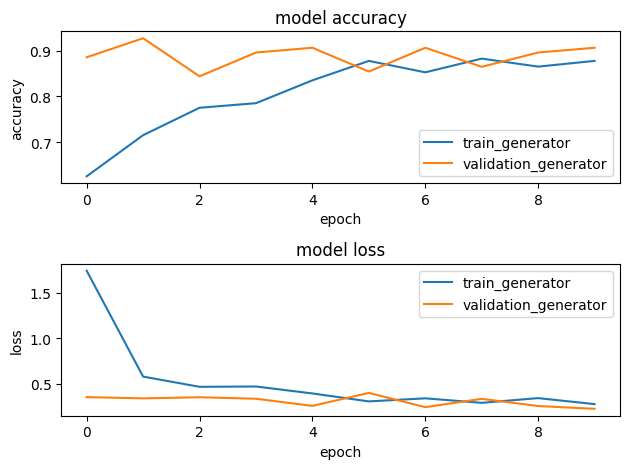

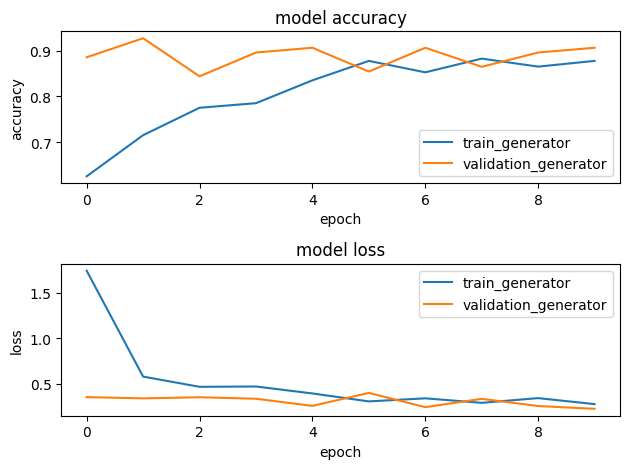

In [15]:
import os
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_generator', 'validation_generator'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_generator', 'validation_generator'], loc='upper right')
plt.tight_layout()
fig

https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd
https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8

In [19]:
import numpy as np
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array 
test_image = image.load_img(r'C:\D_Drive\Work\Academic Classes\Image_Processing\v_data\Car_11.jpg', target_size=(img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices
if result [0][0] >= 0.5:
    prediction = 'plane'
else:
    prediction = 'car'

print(prediction)

1/1 [==============================] - 0s 22ms/step
car
